# Creating New Data Points, Visualization, etc.

In [1]:
# library load
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
bach = pd.read_csv('the_bachelor.csv')
bach.head()

,Unnamed: 0,BACHELOR,BACHELOR_AGE,BACHELOR_HEIGHT,SEASON,BACHELOR_HOMETOWN_CITY,BACHELOR_HOMETOWN_STATE,CONTESTANT,CONTESTANT_AGE,CONTESTANT_JOB,CONTESTANT_HEIGHT,CONTESTANT_ELIMWEEK,CONTESTANT_HOMETOWN_CITY,CONTESTANT_HOMETOWN_STATE
0,0,Alex Michel,32,NaN,1,Charlottesville,VA,Amanda Marsh,23.0,Event Planner,NaN,NaN,Chanute,KS
1,1,Alex Michel,32,NaN,1,Charlottesville,VA,Trista Rehn,29.0,Miami Heat Dancer,NaN,6.0,Miami,FL
2,2,Alex Michel,32,NaN,1,Charlottesville,VA,Shannon Oliver,24.0,Financial Management Consultant,NaN,5.0,Dallas,TX
3,3,Alex Michel,32,NaN,1,Charlottesville,VA,Kim,24.0,Nanny,NaN,4.0,Tempe,AZ
4,4,Alex Michel,32,NaN,1,Charlottesville,VA,Cathy Grimes,22.0,Graduate Student,NaN,3.0,Terra Haute,IN


### Variables To Create: 
* Age Difference between Contestant and Bachelor
* Age Difference between Contestant and Mean of Contestant Pool for the Season
* Binary for Same Hometown City
* Binary for Same Hometown State
* Difference in Height between Contestant and Bachelor
* Region for State
* Binary for Same State Region
* More Generalized Contestant Job (???)

In [3]:
# Age Difference between Contestant and Bachelor
bach['AGE_DIFF'] = bach['BACHELOR_AGE'] - bach['CONTESTANT_AGE']

,Unnamed: 0,BACHELOR,BACHELOR_AGE,BACHELOR_HEIGHT,SEASON,BACHELOR_HOMETOWN_CITY,BACHELOR_HOMETOWN_STATE,CONTESTANT,CONTESTANT_AGE,CONTESTANT_JOB,CONTESTANT_HEIGHT,CONTESTANT_ELIMWEEK,CONTESTANT_HOMETOWN_CITY,CONTESTANT_HOMETOWN_STATE,AGE_DIFF
0,0,Alex Michel,32,NaN,1,Charlottesville,VA,Amanda Marsh,23.0,Event Planner,NaN,NaN,Chanute,KS,9.0
1,1,Alex Michel,32,NaN,1,Charlottesville,VA,Trista Rehn,29.0,Miami Heat Dancer,NaN,6.0,Miami,FL,3.0
2,2,Alex Michel,32,NaN,1,Charlottesville,VA,Shannon Oliver,24.0,Financial Management Consultant,NaN,5.0,Dallas,TX,8.0
3,3,Alex Michel,32,NaN,1,Charlottesville,VA,Kim,24.0,Nanny,NaN,4.0,Tempe,AZ,8.0
4,4,Alex Michel,32,NaN,1,Charlottesville,VA,Cathy Grimes,22.0,Graduate Student,NaN,3.0,Terra Haute,IN,10.0


In [7]:
# Age Difference between Contestant and Mean of Contestant Pool for the Season
bach = bach.merge(bach[['SEASON', 'CONTESTANT_AGE']].groupby(['SEASON'], as_index=False).mean(), on='SEASON', suffixes=['', '_MEAN'])
bach.head()

,Unnamed: 0,BACHELOR,BACHELOR_AGE,BACHELOR_HEIGHT,SEASON,BACHELOR_HOMETOWN_CITY,BACHELOR_HOMETOWN_STATE,CONTESTANT,CONTESTANT_AGE,CONTESTANT_JOB,CONTESTANT_HEIGHT,CONTESTANT_ELIMWEEK,CONTESTANT_HOMETOWN_CITY,CONTESTANT_HOMETOWN_STATE,AGE_DIFF,CONTESTANT_AGE_MEAN
0,0,Alex Michel,32,NaN,1,Charlottesville,VA,Amanda Marsh,23.0,Event Planner,NaN,NaN,Chanute,KS,9.0,26.4
1,1,Alex Michel,32,NaN,1,Charlottesville,VA,Trista Rehn,29.0,Miami Heat Dancer,NaN,6.0,Miami,FL,3.0,26.4
2,2,Alex Michel,32,NaN,1,Charlottesville,VA,Shannon Oliver,24.0,Financial Management Consultant,NaN,5.0,Dallas,TX,8.0,26.4
3,3,Alex Michel,32,NaN,1,Charlottesville,VA,Kim,24.0,Nanny,NaN,4.0,Tempe,AZ,8.0,26.4
4,4,Alex Michel,32,NaN,1,Charlottesville,VA,Cathy Grimes,22.0,Graduate Student,NaN,3.0,Terra Haute,IN,10.0,26.4


In [8]:
bach['AGE_DIFF_MEAN_POOL'] = bach['CONTESTANT_AGE'] - bach['CONTESTANT_AGE_MEAN']
bach.head()

,Unnamed: 0,BACHELOR,BACHELOR_AGE,BACHELOR_HEIGHT,SEASON,BACHELOR_HOMETOWN_CITY,BACHELOR_HOMETOWN_STATE,CONTESTANT,CONTESTANT_AGE,CONTESTANT_JOB,CONTESTANT_HEIGHT,CONTESTANT_ELIMWEEK,CONTESTANT_HOMETOWN_CITY,CONTESTANT_HOMETOWN_STATE,AGE_DIFF,CONTESTANT_AGE_MEAN,AGE_DIFF_MEAN_POOL
0,0,Alex Michel,32,NaN,1,Charlottesville,VA,Amanda Marsh,23.0,Event Planner,NaN,NaN,Chanute,KS,9.0,26.4,-3.4
1,1,Alex Michel,32,NaN,1,Charlottesville,VA,Trista Rehn,29.0,Miami Heat Dancer,NaN,6.0,Miami,FL,3.0,26.4,2.6
2,2,Alex Michel,32,NaN,1,Charlottesville,VA,Shannon Oliver,24.0,Financial Management Consultant,NaN,5.0,Dallas,TX,8.0,26.4,-2.4
3,3,Alex Michel,32,NaN,1,Charlottesville,VA,Kim,24.0,Nanny,NaN,4.0,Tempe,AZ,8.0,26.4,-2.4
4,4,Alex Michel,32,NaN,1,Charlottesville,VA,Cathy Grimes,22.0,Graduate Student,NaN,3.0,Terra Haute,IN,10.0,26.4,-4.4


In [9]:
# Age Difference between the Bachelor and the Contestant Pool
bach['AGE_DIFF_BACH_POOL'] = bach['BACHELOR_AGE'] - bach['CONTESTANT_AGE_MEAN']

## Visualization of Age Difference Variables

#### Average Age of the Contestant Pool for 16 Seasons of The Bachelor

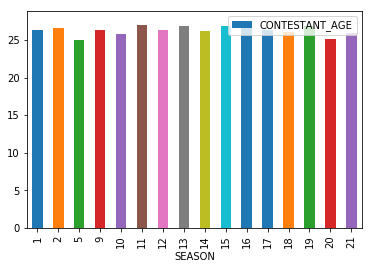

In [10]:
av_age = bach[['SEASON', 'CONTESTANT_AGE']].groupby(['SEASON'], as_index=False).mean()
av_age.plot.bar(x='SEASON', y='CONTESTANT_AGE')

#### Difference in Age Between the Bachelor and Each Contestant

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


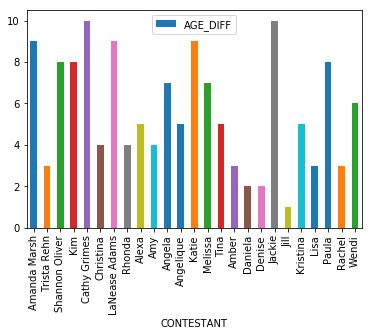

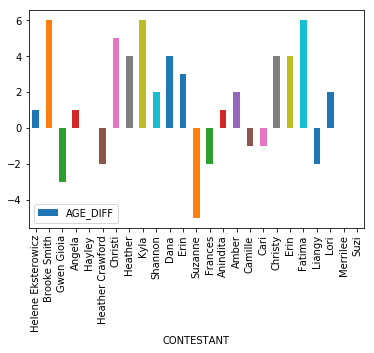

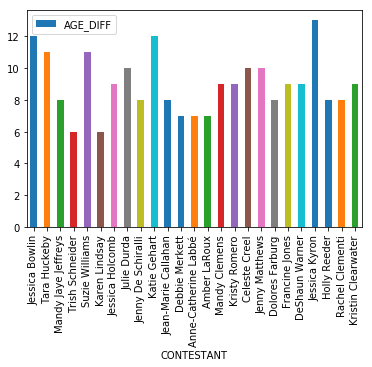

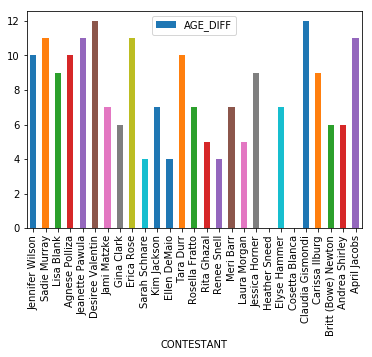

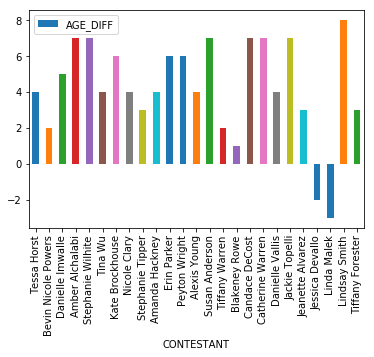

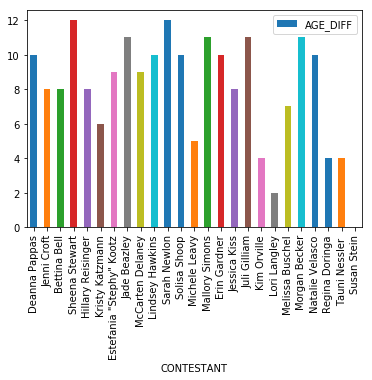

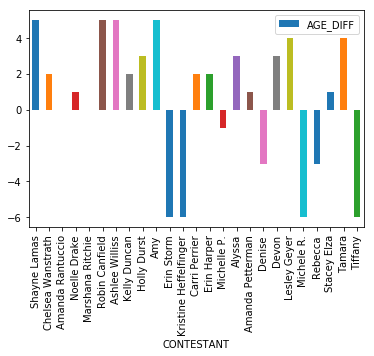

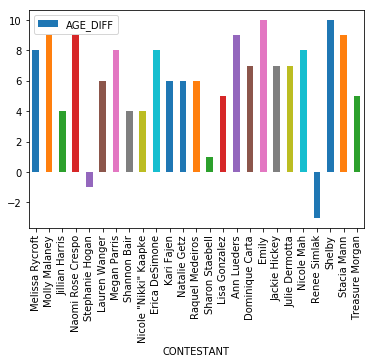

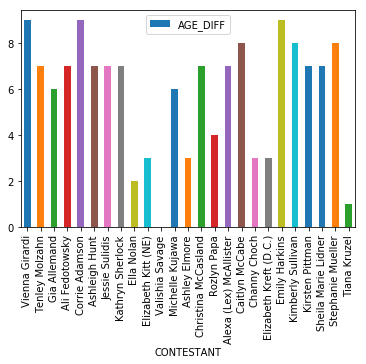

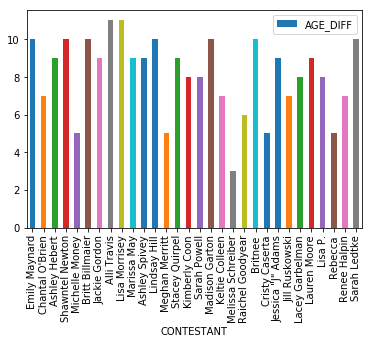

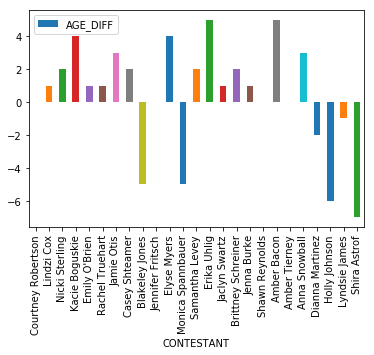

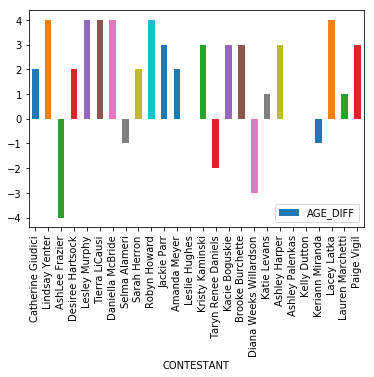

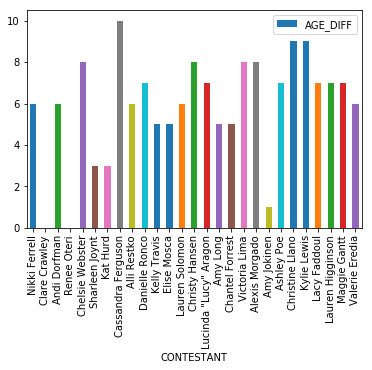

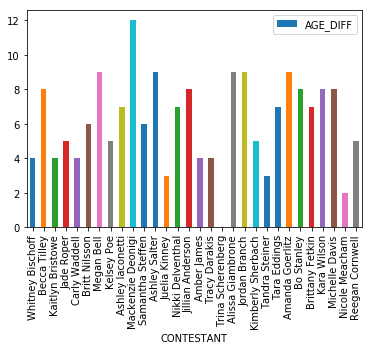

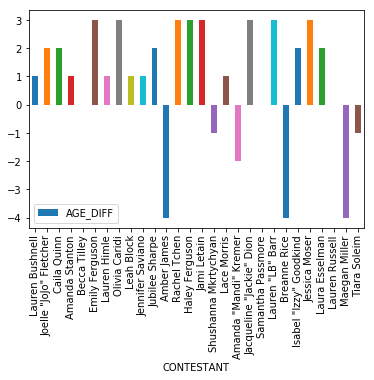

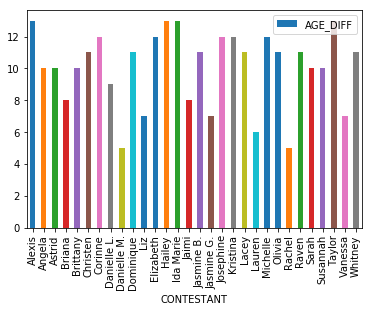

In [13]:
for each_season in bach['SEASON'].unique(): 
    age_diff_plot = bach[bach['SEASON'] == each_season]
    print(age_diff_plot.plot.bar(x='CONTESTANT', y='AGE_DIFF'))

In [21]:
# Create a categorical 'younger', 'same', 'older' variable for bachelor age vs. contestant age
bach['AGE_DIFF_CAT'] = np.where(bach['AGE_DIFF'].isnull(), 4, np.where(bach['AGE_DIFF'] > 0, 2, np.where(bach['AGE_DIFF'] == 0, 1, 0)))
bach['AGE_DIFF_CAT'].value_counts()

2    366
0     35
1     21
4      1
Name: AGE_DIFF_CAT, dtype: int64

Contestants are
2: Younger
1: Same
0: Older
4: Missing

In [17]:
len(bach['AGE_DIFF_CAT'])

423

In [22]:
bach.head()

,Unnamed: 0,BACHELOR,BACHELOR_AGE,BACHELOR_HEIGHT,SEASON,BACHELOR_HOMETOWN_CITY,BACHELOR_HOMETOWN_STATE,CONTESTANT,CONTESTANT_AGE,CONTESTANT_JOB,CONTESTANT_HEIGHT,CONTESTANT_ELIMWEEK,CONTESTANT_HOMETOWN_CITY,CONTESTANT_HOMETOWN_STATE,AGE_DIFF,CONTESTANT_AGE_MEAN,AGE_DIFF_MEAN_POOL,AGE_DIFF_BACH_POOL,AGE_DIFF_CAT
0,0,Alex Michel,32,NaN,1,Charlottesville,VA,Amanda Marsh,23.0,Event Planner,NaN,NaN,Chanute,KS,9.0,26.4,-3.4,5.6,2
1,1,Alex Michel,32,NaN,1,Charlottesville,VA,Trista Rehn,29.0,Miami Heat Dancer,NaN,6.0,Miami,FL,3.0,26.4,2.6,5.6,2
2,2,Alex Michel,32,NaN,1,Charlottesville,VA,Shannon Oliver,24.0,Financial Management Consultant,NaN,5.0,Dallas,TX,8.0,26.4,-2.4,5.6,2
3,3,Alex Michel,32,NaN,1,Charlottesville,VA,Kim,24.0,Nanny,NaN,4.0,Tempe,AZ,8.0,26.4,-2.4,5.6,2
4,4,Alex Michel,32,NaN,1,Charlottesville,VA,Cathy Grimes,22.0,Graduate Student,NaN,3.0,Terra Haute,IN,10.0,26.4,-4.4,5.6,2


In [23]:
# Binary for same city or state
bach['SAME_CITY'] = np.where(bach['BACHELOR_HOMETOWN_CITY'] == bach['CONTESTANT_HOMETOWN_CITY'], 1, 0)
bach['SAME_STATE'] = np.where(bach['BACHELOR_HOMETOWN_STATE'] == bach['BACHELOR_HOMETOWN_STATE'], 1, 0)

In [24]:
# Difference in Height
bach['HEIGHT_DIFF'] = bach['BACHELOR_HEIGHT'] - bach['CONTESTANT_HEIGHT']
bach['HEIGHT_BIN'] = np.where(bach['HEIGHT_DIFF'].isnull(), 4, np.where(bach['HEIGHT_DIFF'] > 0, 2, np.where(bach['HEIGHT_DIFF'] == 0, 1, 0)))

Contestants are: 
2: Taller
1: Same Height
0: Shorter
4: Missing

In [25]:
states = {
        'AK': 'O',
        'AL': 'S',
        'AR': 'S',
        'AS': 'O',
        'AZ': 'W',
        'CA': 'W',
        'CO': 'W',
        'CT': 'N',
        'DC': 'N',
        'DE': 'N',
        'FL': 'S',
        'GA': 'S',
        'GU': 'O',
        'HI': 'O',
        'IA': 'M',
        'ID': 'W',
        'IL': 'M',
        'IN': 'M',
        'KS': 'M',
        'KY': 'S',
        'LA': 'S',
        'MA': 'N',
        'MD': 'N',
        'ME': 'N',
        'MI': 'W',
        'MN': 'M',
        'MO': 'M',
        'MP': 'O',
        'MS': 'S',
        'MT': 'W',
        'NA': 'O',
        'NC': 'S',
        'ND': 'M',
        'NE': 'W',
        'NH': 'N',
        'NJ': 'N',
        'NM': 'W',
        'NV': 'W',
        'NY': 'N',
        'OH': 'M',
        'OK': 'S',
        'OR': 'W',
        'PA': 'N',
        'PR': 'O',
        'RI': 'N',
        'SC': 'S',
        'SD': 'M',
        'TN': 'S',
        'TX': 'S',
        'UT': 'W',
        'VA': 'S',
        'VI': 'O',
        'VT': 'N',
        'WA': 'W',
        'WI': 'M',
        'WV': 'S',
        'WY': 'W'
}

## Mapping State to Region

In [26]:
# Convert Bachelor state to region
StateRegion = []
for index, row in bach.iterrows():
    #print(row['c1'], row['c2'])
    if row['BACHELOR_HOMETOWN_STATE'] in states: 
        StateRegion.append(states[row['BACHELOR_HOMETOWN_STATE']])
    else: 
        StateRegion.append(row['BACHELOR_HOMETOWN_STATE'])
        
bach['BACHELOR_REGION'] = StateRegion
bach.head()

,Unnamed: 0,BACHELOR,BACHELOR_AGE,BACHELOR_HEIGHT,SEASON,BACHELOR_HOMETOWN_CITY,BACHELOR_HOMETOWN_STATE,CONTESTANT,CONTESTANT_AGE,CONTESTANT_JOB,...,AGE_DIFF,CONTESTANT_AGE_MEAN,AGE_DIFF_MEAN_POOL,AGE_DIFF_BACH_POOL,AGE_DIFF_CAT,SAME_CITY,SAME_STATE,HEIGHT_DIFF,HEIGHT_BIN,BACHELOR_REGION
0,0,Alex Michel,32,NaN,1,Charlottesville,VA,Amanda Marsh,23.0,Event Planner,...,9.0,26.4,-3.4,5.6,2,0,1,NaN,4,S
1,1,Alex Michel,32,NaN,1,Charlottesville,VA,Trista Rehn,29.0,Miami Heat Dancer,...,3.0,26.4,2.6,5.6,2,0,1,NaN,4,S
2,2,Alex Michel,32,NaN,1,Charlottesville,VA,Shannon Oliver,24.0,Financial Management Consultant,...,8.0,26.4,-2.4,5.6,2,0,1,NaN,4,S
3,3,Alex Michel,32,NaN,1,Charlottesville,VA,Kim,24.0,Nanny,...,8.0,26.4,-2.4,5.6,2,0,1,NaN,4,S
4,4,Alex Michel,32,NaN,1,Charlottesville,VA,Cathy Grimes,22.0,Graduate Student,...,10.0,26.4,-4.4,5.6,2,0,1,NaN,4,S


In [27]:
# Convert Contestant state to region
StateRegion = []
for index, row in bach.iterrows():
    #print(row['c1'], row['c2'])
    if row['CONTESTANT_HOMETOWN_STATE'] in states: 
        StateRegion.append(states[row['CONTESTANT_HOMETOWN_STATE']])
    else: 
        StateRegion.append(row['CONTESTANT_HOMETOWN_STATE'])
        
bach['CONTESTANT_REGION'] = StateRegion
bach.head()

,Unnamed: 0,BACHELOR,BACHELOR_AGE,BACHELOR_HEIGHT,SEASON,BACHELOR_HOMETOWN_CITY,BACHELOR_HOMETOWN_STATE,CONTESTANT,CONTESTANT_AGE,CONTESTANT_JOB,...,CONTESTANT_AGE_MEAN,AGE_DIFF_MEAN_POOL,AGE_DIFF_BACH_POOL,AGE_DIFF_CAT,SAME_CITY,SAME_STATE,HEIGHT_DIFF,HEIGHT_BIN,BACHELOR_REGION,CONTESTANT_REGION
0,0,Alex Michel,32,NaN,1,Charlottesville,VA,Amanda Marsh,23.0,Event Planner,...,26.4,-3.4,5.6,2,0,1,NaN,4,S,M
1,1,Alex Michel,32,NaN,1,Charlottesville,VA,Trista Rehn,29.0,Miami Heat Dancer,...,26.4,2.6,5.6,2,0,1,NaN,4,S,S
2,2,Alex Michel,32,NaN,1,Charlottesville,VA,Shannon Oliver,24.0,Financial Management Consultant,...,26.4,-2.4,5.6,2,0,1,NaN,4,S,S
3,3,Alex Michel,32,NaN,1,Charlottesville,VA,Kim,24.0,Nanny,...,26.4,-2.4,5.6,2,0,1,NaN,4,S,W
4,4,Alex Michel,32,NaN,1,Charlottesville,VA,Cathy Grimes,22.0,Graduate Student,...,26.4,-4.4,5.6,2,0,1,NaN,4,S,M


Regions: 
N - North East 
W - West 
M - Mid West 
S - South 
O - Other

In [28]:
# binary if bachelor region and contestant region are the same
bach['SAME_REGION'] = np.where(bach['BACHELOR_REGION'] == bach['CONTESTANT_REGION'], 1, 0)

In [31]:
bach.columns

Index(['Unnamed: 0', 'BACHELOR', 'BACHELOR_AGE', 'BACHELOR_HEIGHT', 'SEASON',
       'BACHELOR_HOMETOWN_CITY', 'BACHELOR_HOMETOWN_STATE', 'CONTESTANT',
       'CONTESTANT_AGE', 'CONTESTANT_JOB', 'CONTESTANT_HEIGHT',
       'CONTESTANT_ELIMWEEK', 'CONTESTANT_HOMETOWN_CITY',
       'CONTESTANT_HOMETOWN_STATE', 'AGE_DIFF', 'CONTESTANT_AGE_MEAN',
       'AGE_DIFF_MEAN_POOL', 'AGE_DIFF_BACH_POOL', 'AGE_DIFF_CAT', 'SAME_CITY',
       'SAME_STATE', 'HEIGHT_DIFF', 'HEIGHT_BIN', 'BACHELOR_REGION',
       'CONTESTANT_REGION', 'SAME_REGION'],
      dtype='object')

## Mark the Winners

In [32]:
bach['WINNER'] = np.where(bach.CONTESTANT_ELIMWEEK.isnull(), 1, 0)

### For Prediction
* Can get rid of all the bachelor columns (they are same for all seasons)
* Any of the categorical variables will need to be transformed into numbers (i think)
* Train set would be x number of full seasons
* Test set would be one season with the winner mark removed

In [33]:
# get rid of unecessary columns
bach_slim = bach[['SEASON', 'CONTESTANT', 'CONTESTANT_JOB', 'CONTESTANT_HEIGHT', 'HEIGHT_DIFF', 'HEIGHT_BIN', 'CONTESTANT_HOMETOWN_CITY', 'SAME_CITY', 'SAME_STATE', 'CONTESTANT_HOMETOWN_STATE', 'CONTESTANT_REGION', 'SAME_REGION', 'AGE_DIFF', 'AGE_DIFF_MEAN_POOL', 'AGE_DIFF_BACH_POOL', 'AGE_DIFF_CAT', 'CONTESTANT_ELIMWEEK', 'WINNER']].copy()

In [34]:
bach_slim.dtypes

SEASON                         int64
CONTESTANT                    object
CONTESTANT_JOB                object
CONTESTANT_HEIGHT            float64
HEIGHT_DIFF                  float64
HEIGHT_BIN                     int32
CONTESTANT_HOMETOWN_CITY      object
SAME_CITY                      int32
SAME_STATE                     int32
CONTESTANT_HOMETOWN_STATE     object
CONTESTANT_REGION             object
SAME_REGION                    int32
AGE_DIFF                     float64
AGE_DIFF_MEAN_POOL           float64
AGE_DIFF_BACH_POOL           float64
AGE_DIFF_CAT                   int32
CONTESTANT_ELIMWEEK          float64
WINNER                         int32
dtype: object

In [35]:
bach_slim.to_csv("slim_set_bachelor.csv")

##### Notes
* Will probably have to change some variables to binary form if we want to use random forest
